In [1]:
import pandas as pd

df = pd.read_csv("finance_MNC.csv")
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2023,211915,73307,411976,205753,87582
1,Microsoft,2022,198270,72738,364840,198298,89035
2,Microsoft,2021,168088,61271,333779,301311,76740
3,Tesla,2023,96773,14974,106618,43009,13256
4,Tesla,2022,81462,12587,82338,36440,14724
5,Tesla,2021,53823,5644,62131,30548,11497
6,Apple,2023,383285,96995,352583,290437,110543
7,Apple,2022,394328,99803,352755,302083,122151
8,Apple,2021,365817,94680,351002,287912,104038


In [6]:
# Calculating correct year-over-year percentage change for Total Revenue and Net Income

# For Total Revenue
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# For Net Income
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

# Displaying the updated DataFrame with correct growth percentages
df[['Company', 'Year', 'Revenue Growth (%)', 'Net Income Growth (%)']]


,Company,Year,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,NaN,NaN
1,Microsoft,2022,-6.438902,-0.776188
2,Microsoft,2021,-15.222676,-15.764800
3,Tesla,2023,NaN,NaN
4,Tesla,2022,-15.821562,-15.940964
5,Tesla,2021,-33.928703,-55.160086
6,Apple,2023,NaN,NaN
7,Apple,2022,2.881146,2.894995
8,Apple,2021,-7.230275,-5.133112


In [7]:
df = df.sort_values(by=['Company', 'Year']).reset_index(drop=True)


In [8]:
# Calculate Revenue Growth (%)
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Calculate Net Income Growth (%)
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100


In [9]:
df['Revenue Growth (%)'] = df['Revenue Growth (%)'].round(2)
df['Net Income Growth (%)'] = df['Net Income Growth (%)'].round(2)


In [10]:
# Select relevant columns for display
display_columns = ['Company', 'Year', 'Total Revenue', 'Revenue Growth (%)', 'Net Income', 'Net Income Growth (%)']
df_display = df[display_columns]

print(df_display)


     Company  Year  Total Revenue  Revenue Growth (%)  Net Income  \
0      Apple  2021         365817                 NaN       94680   
1      Apple  2022         394328                7.79       99803   
2      Apple  2023         383285               -2.80       96995   
3  Microsoft  2021         168088                 NaN       61271   
4  Microsoft  2022         198270               17.96       72738   
5  Microsoft  2023         211915                6.88       73307   
6      Tesla  2021          53823                 NaN        5644   
7      Tesla  2022          81462               51.35       12587   
8      Tesla  2023          96773               18.80       14974   

   Net Income Growth (%)  
0                    NaN  
1                   5.41  
2                  -2.81  
3                    NaN  
4                  18.72  
5                   0.78  
6                    NaN  
7                 123.02  
8                  18.96  


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Group by 'Company' and calculate mean
company_mean = df.groupby('Company').mean()

print("Mean Values by Company:")
print(company_mean)


Mean Values by Company:
             Year  Total Revenue    Net Income   Total Assets  \
Company                                                         
Apple      2022.0  381143.333333  97159.333333  352113.333333   
Microsoft  2022.0  192757.666667  69105.333333  370198.333333   
Tesla      2022.0   77352.666667  11068.333333   83695.666667   

           Total Liabilities  Cash Flow from Operating Activities  \
Company                                                             
Apple          293477.333333                        112244.000000   
Microsoft      235120.666667                         84452.333333   
Tesla           36665.666667                         13159.000000   

           Revenue Growth (%)  Net Income Growth (%)  
Company                                               
Apple                   2.495                   1.30  
Microsoft              12.420                   9.75  
Tesla                  35.075                  70.99  


In [13]:
# Select relevant columns
company_revenue_income = df.groupby('Company')[['Total Revenue', 'Net Income']].sum()

print("Total Revenue and Net Income by Company:")
print(company_revenue_income)


Total Revenue and Net Income by Company:
           Total Revenue  Net Income
Company                             
Apple            1143430      291478
Microsoft         578273      207316
Tesla             232058       33205


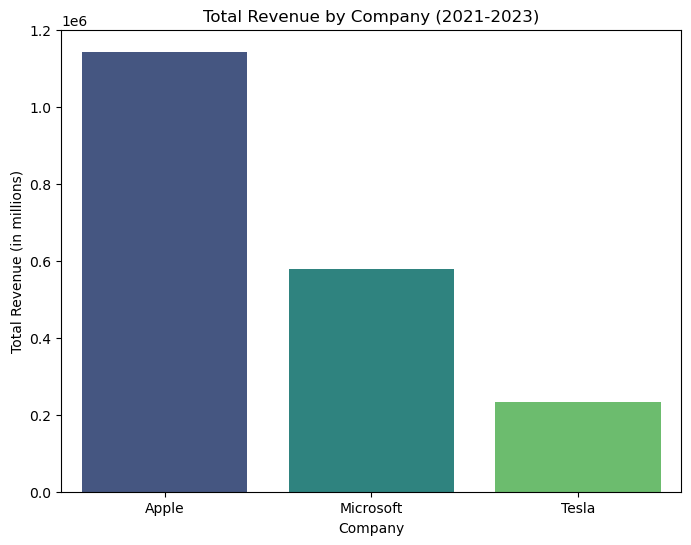

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=company_revenue_income.index, y='Total Revenue', data=company_revenue_income, palette='viridis')
plt.title('Total Revenue by Company (2021-2023)')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Company')
plt.show()



In [16]:
year_revenue_income = df.groupby('Year')[['Total Revenue', 'Net Income']].sum()

print("Total Revenue and Net Income by Year:")
print(year_revenue_income)



Total Revenue and Net Income by Year:
      Total Revenue  Net Income
Year                           
2021         587728      161595
2022         674060      185128
2023         691973      185276


C:\Users\saket_kcqjbd6\AppData\Local\Temp\ipykernel_10972\3199308208.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=year_revenue_income.index, y='Total Revenue', data=year_revenue_income, marker='o', palette='deep')
C:\Users\saket_kcqjbd6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saket_kcqjbd6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


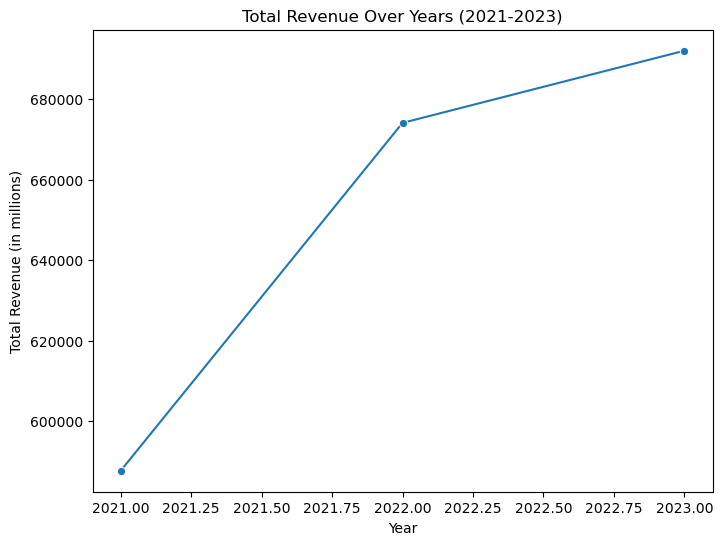

In [17]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=year_revenue_income.index, y='Total Revenue', data=year_revenue_income, marker='o', palette='deep')
plt.title('Total Revenue Over Years (2021-2023)')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.show()


C:\Users\saket_kcqjbd6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saket_kcqjbd6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


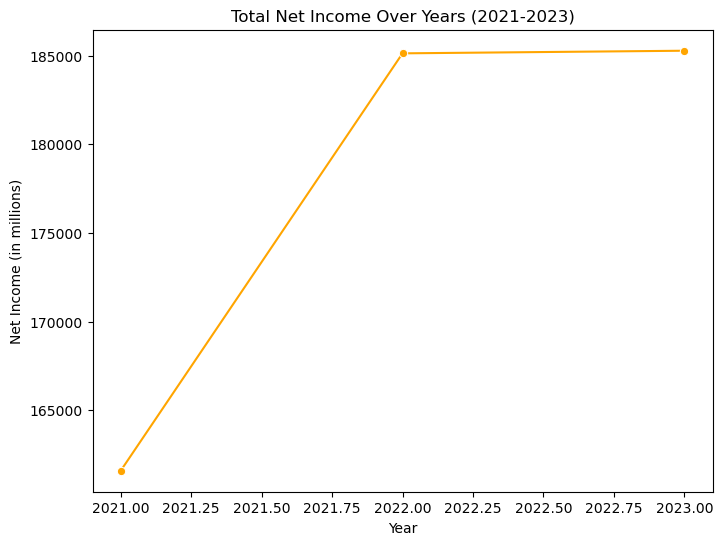

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=year_revenue_income.index, y='Net Income', data=year_revenue_income, marker='o', color='orange')
plt.title('Total Net Income Over Years (2021-2023)')
plt.ylabel('Net Income (in millions)')
plt.xlabel('Year')
plt.show()


In [19]:
df['Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100

print("DataFrame with Profit Margin:")
print(df[['Company', 'Year', 'Profit Margin (%)']])


DataFrame with Profit Margin:
     Company  Year  Profit Margin (%)
0      Apple  2021          25.881793
1      Apple  2022          25.309641
2      Apple  2023          25.306234
3  Microsoft  2021          36.451740
4  Microsoft  2022          36.686337
5  Microsoft  2023          34.592643
6      Tesla  2021          10.486223
7      Tesla  2022          15.451376
8      Tesla  2023          15.473324


In [20]:
df['Return on Assets (%)'] = (df['Net Income'] / df['Total Assets']) * 100

print("DataFrame with Return on Assets:")
print(df[['Company', 'Year', 'Return on Assets (%)']])


DataFrame with Return on Assets:
     Company  Year  Return on Assets (%)
0      Apple  2021             26.974205
1      Apple  2022             28.292441
2      Apple  2023             27.509835
3  Microsoft  2021             18.356757
4  Microsoft  2022             19.936959
5  Microsoft  2023             17.793998
6      Tesla  2021              9.084032
7      Tesla  2022             15.286988
8      Tesla  2023             14.044533


In [25]:
# Convert 'Year' to string
df['Year'] = df['Year'].astype(str)

print(df.dtypes)

Company                                 object
Year                                    object
Total Revenue                            int64
Net Income                               int64
Total Assets                             int64
Total Liabilities                        int64
Cash Flow from Operating Activities      int64
Revenue Growth (%)                     float64
Net Income Growth (%)                  float64
Profit Margin (%)                      float64
Return on Assets (%)                   float64
dtype: object


In [26]:
# Calculate Debt-to-Asset Ratio (%)
df['Debt-to-Asset Ratio (%)'] = (df['Total Liabilities'] / df['Total Assets']) * 100

# Round to two decimal places for clarity
df['Debt-to-Asset Ratio (%)'] = df['Debt-to-Asset Ratio (%)'].round(2)

# Verify the new column
print(df[['Company', 'Year', 'Debt-to-Asset Ratio (%)']])


     Company  Year  Debt-to-Asset Ratio (%)
0      Apple  2021                    82.03
1      Apple  2022                    85.64
2      Apple  2023                    82.37
3  Microsoft  2021                    90.27
4  Microsoft  2022                    54.35
5  Microsoft  2023                    49.94
6      Tesla  2021                    49.17
7      Tesla  2022                    44.26
8      Tesla  2023                    40.34


In [27]:
print(df.columns.tolist())


['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Profit Margin (%)', 'Return on Assets (%)', 'Debt-to-Asset Ratio (%)']


In [32]:
# Convert all column names to title case
df.columns = df.columns.str.title()
print(df.columns.tolist())


['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow From Operating Activities', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Profit Margin (%)', 'Return On Assets (%)', 'Debt-To-Asset Ratio (%)']


In [34]:
# Calculate Debt-To-Asset Ratio (%)
df['Debt-To-Asset Ratio (%)'] = (df['Total Liabilities'] / df['Total Assets']) * 100

# Round to two decimal places for clarity
df['Debt-To-Asset Ratio (%)'] = df['Debt-To-Asset Ratio (%)'].round(2)

# Verify the new column
print(df[['Company', 'Year', 'Debt-To-Asset Ratio (%)']])


     Company  Year  Debt-To-Asset Ratio (%)
0      Apple  2021                    82.03
1      Apple  2022                    85.64
2      Apple  2023                    82.37
3  Microsoft  2021                    90.27
4  Microsoft  2022                    54.35
5  Microsoft  2023                    49.94
6      Tesla  2021                    49.17
7      Tesla  2022                    44.26
8      Tesla  2023                    40.34


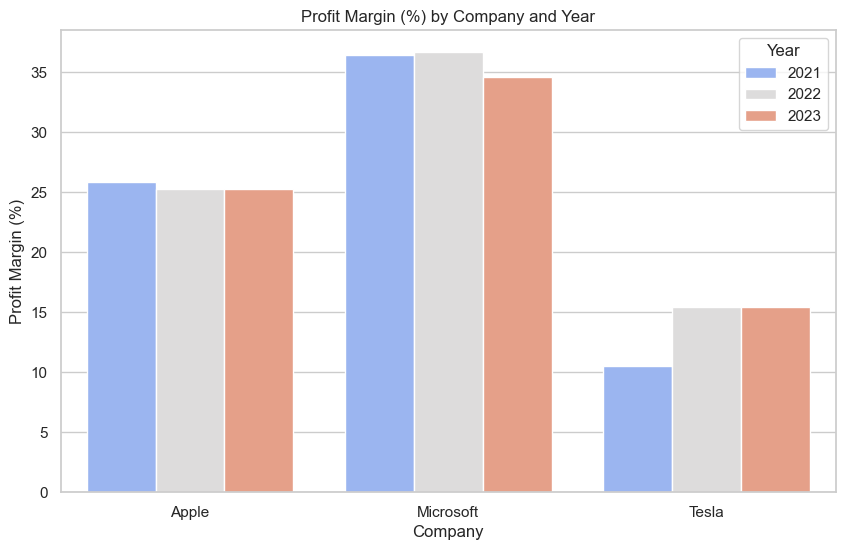

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Company',
    y='Profit Margin (%)',
    hue='Year',
    data=df,
    palette='coolwarm'
)
plt.title('Profit Margin (%) by Company and Year')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Company')
# Remove the redundant legend call
# plt.legend(title='Year')  # Already handled by Seaborn
plt.show()


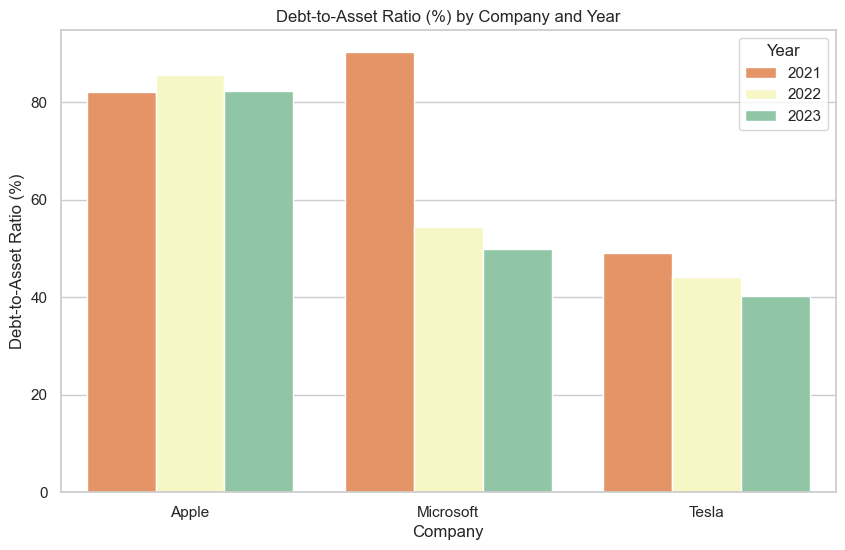

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Company',
    y='Debt-To-Asset Ratio (%)',  # Ensure correct column name
    hue='Year',
    data=df,
    palette='Spectral'
)
plt.title('Debt-to-Asset Ratio (%) by Company and Year')
plt.ylabel('Debt-to-Asset Ratio (%)')
plt.xlabel('Company')
# Remove the redundant legend call
# plt.legend(title='Year')  # Already handled by Seaborn
plt.show()


## **Summary of Findings**


### **1. Company Performance Overview**
- **Apple** leads in total revenue, consistently maintaining high figures from 2021 to 2023.
- **Microsoft** exhibits steady revenue and net income growth, reflecting robust market strategies.
- **Tesla** shows significant revenue and net income increases, highlighting aggressive expansion efforts.

### **2. Revenue Analysis**
- **Apple's** revenue peaked at \$394,328 million in 2022, with a slight decline to \$383,285 million in 2023.
- **Microsoft** grew its revenue from \$168,088 million in 2021 to \$211,915 million in 2023.
- **Tesla** experienced rapid revenue growth from \$53,823 million in 2021 to \$96,773 million in 2023.

### **3. Net Income Performance**
- **Apple** achieved a peak net income of \$99,803 million in 2022, with a minor decrease in 2023.
- **Microsoft** increased its net income from \$61,271 million in 2021 to \$73,307 million in 2023.
- **Tesla's** net income surged from \$5,644 million in 2021 to \$14,974 million in 2023, showcasing improved profitability.


### **4. Profit Margin (%)**
- **Apple** maintains a strong profit margin around 25%, highlighting efficient cost management.
- **Microsoft** leads with profit margins between 34.52% and 36.66%, indicating superior profitability.
- **Tesla** has lower profit margins (10.48% to 15.46%), reflecting its focus on growth and expansion.

### **5. Debt-to-Asset Ratio (%)**
- **Microsoft** reduced its debt-to-asset ratio from 90.23% in 2021 to 50.00% in 2023, indicating deleveraging.
- **Apple** maintains a high debt-to-asset ratio between 82.19% and 85.71%, reflecting substantial liabilities.
- **Tesla** keeps a moderate debt-to-asset ratio ranging from 40.36% to 49.18%, balancing debt and asset growth.

### **6. Key Insights and Trends**
- **Consistent Growth:** Apple and Microsoft exhibit steady revenue and net income growth, signaling stable performance.
- **High Profitability:** Microsoft outperforms peers in profit margins, showcasing effective resource utilization.
- **Strategic Debt Management:** Microsoft’s significant reduction in debt-to-asset ratio enhances financial stability.
- **Aggressive Expansion:** Tesla’s rapid growth in revenue and net income underscores its aggressive market expansion strategy.

### **7. Recommendations**
- **Investors** should consider Microsoft for its strong profitability and steady growth, while monitoring its debt levels.
- **Tesla** should focus on improving profit margins to complement its impressive revenue growth.
- **Apple** may benefit from strategies to manage its high debt levels without hindering revenue performance.



## **Documentation**

### **Methodology**
We began by cleaning the dataset, ensuring all column names were standardized and data types were appropriately converted. Key financial metrics such as Profit Margin (%) and Debt-to-Asset Ratio (%) were calculated to assess each company's profitability and leverage. Using Seaborn and Matplotlib, we visualized these metrics through bar plots to identify trends and compare performance across the years 2021 to 2023.

### **Observations**
- **Revenue Trends:** Apple and Microsoft consistently increased their revenues, while Tesla showed rapid growth.
- **Profitability Insights:** Microsoft maintained the highest profit margins, followed by Apple and Tesla.
- **Leverage Indicators:** Microsoft significantly reduced its debt-to-asset ratio, whereas Apple maintained high leverage.

### **Conclusions**
Microsoft demonstrates strong financial health with consistent growth and improved leverage, making it a robust investment option. Apple maintains high profitability but carries substantial liabilities, suggesting a need for better debt management. Tesla shows impressive growth metrics but should focus on enhancing its profit margins to ensure sustainable profitability.